# Exploration of risk data

This notebook shows the structure of the diffent risk layers and boundaries(number and types of columns and rows) and plot them in a map to get insight of the spatial distribution. 

Finally, it shows an example of how risks from different layers are associated with a point location using a simple spatial query.

In [62]:
import os
import glob
import shutil
import zipfile
import geopandas
import matplotlib.pyplot as plt

Set data paths. All paths are relative to the repository folder. All the data sets are expected to be under folder data.
 - Risk layers are loaded from a zip file under data/risks/
 - Boundaries (loaded later) are expected to be located under data/boundaries (unzipped).

In [63]:
data_path = '../data'
boundaries_path = os.path.join(data_path, 'boundaries')
risks_path = os.path.join(data_path, 'risks')

bundle_name = 'Zihuatanejo_12038'
zip_file_path = os.path.join(risks_path, bundle_name+'.zip')
risks_bundle_path = os.path.join(risks_path, bundle_name)

Unzip risk layers and group each risk layer catetory into a directory.

In [64]:
# unzip risks
if os.path.exists(risks_bundle_path):
    shutil.rmtree(risks_bundle_path)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(risks_path)

In [65]:
# group risk-specific files into folders
risk_categories = {os.path.splitext(file)[0] for file in os.listdir(risks_bundle_path) if not file.endswith('.xml')}
for risk_cat in risk_categories:
    risk_cat_path = os.path.join(risks_bundle_path, risk_cat)
    os.mkdir(risk_cat_path)
    risk_files_paths = glob.glob(os.path.join(risks_bundle_path, risk_cat+'.*'))
    for file_path in risk_files_paths:
        _, file_name = os.path.split(file_path)
        os.rename(file_path, os.path.join(risk_cat_path, file_name))

## Risk Layers Information

In [66]:
# Load all the risks and show a summary 
risk_layers = []
total_risk_count = 0
risk_dirs =  os.listdir(risks_bundle_path)
for risk_dir in risk_dirs:
    risk_layer_gdf = geopandas.read_file(os.path.join(risks_bundle_path, risk_dir))
    # get a set of the different geometry types contained in the current layer
    geom_types = {geom_type for geom_type in risk_layer_gdf.geometry.type.values}
    print(f'{risk_dir}:\n\tShape: {risk_layer_gdf.shape}\n\tGeometry types: {geom_types}, CRS: {risk_layer_gdf.crs.name}')
    total_risk_count += risk_layer_gdf.shape[0]
    display(risk_layer_gdf.head(3))
    risk_layers.append(risk_layer_gdf)
print(f'Number of layers: {len(risk_layers)}. Total number of risk records among all layers: {total_risk_count}')

AR12038_Hur_tray:
	Shape: (12, 19)
	Geometry types: {'LineString'}, CRS: Lambert_Conformal_Conic


,OBJECTID,NOMBRE,CLASIF,FECHA,VIENTO,SISTEMA,FENOMENO,R_P_V_E,FUENTE,INTENSIDAD,REGISTRO,DETALLES,CLAVE,Tipo,Confianza,Metodo,Shape_Leng,AMENZA_ID,geometry
0,1,SIN DATO,Huracan 1,13/Jun/1956 18:00,75,P,H,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C. 2012",ALTO,0054P,Huracan tipo 1,120380001,Evento cuantitativo asociado a una FECHA,No confiable,Ninguna,137593.914058,2,"LINESTRING (2616824.676 501579.605, 2552219.88..."
1,2,SIN DATO,Huracan 1,18/Sep/1957 06:00,75,P,H,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C. 2012",ALTO,0067P,Huracan tipo 1,120380001,Evento cuantitativo asociado a una FECHA,No confiable,Ninguna,54523.043131,2,"LINESTRING (2531883.290 601442.895, 2500000.00..."
2,3,TARA,Huracan 1,12/Nov/1961 00:00,75,P,H,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C. 2012",ALTO,0119P,Huracan tipo 1,120380001,Evento cuantitativo asociado a una FECHA,No confiable,Ninguna,89159.333646,2,"LINESTRING (2553215.398 579359.833, 2563487.90..."


AR12038_Intensidad_Sismica:
	Shape: (9, 21)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,AREA,PERIMETER,I3_,I3_ID,NUMERO,MERCALLI,CLAVE,SISTEMA,FENOMENO,...,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,90729984.0,5343563.5,2.0,1.0,7,7,12038.0,P,G,...,regiones sismica,P,"SSN, 2012, Consultor",Zonificación con un indicador cualitativo,Confiable,Otra,46259.281781,8.004967e+07,5,"POLYGON ((2568739.545 674245.792, 2568801.256 ..."
1,2,90729984.0,5343563.5,2.0,1.0,7,7,12038.0,P,G,...,regiones sismica,P,"SSN, 2012, Consultor",Zonificación con un indicador cualitativo,Confiable,Otra,7912.189176,1.846459e+06,5,"POLYGON ((2555316.844 665719.216, 2554893.256 ..."
2,3,90729984.0,5343563.5,2.0,1.0,7,7,12038.0,P,G,...,regiones sismica,P,"SSN, 2012, Consultor",Zonificación con un indicador cualitativo,Confiable,Otra,178317.530766,7.074623e+08,5,"POLYGON ((2547836.605 648805.715, 2547825.881 ..."


AR12038_per_ret_100:
	Shape: (13, 22)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,AREA,PERIMETER,AMAX100T01,NUMERO,P_RETORNO,P_ESTRUC,A_MAXIMA,CLAVE,SISTEMA,...,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,72129024.0,3706867.50,662.0,2,100,0.15,189,120380001,P,...,"Aceleracion maxima 662 cm, periodo de retorn...",P,"Programa PSM, Cenapred",Peligro,Confiable,Cenapred,4.101320e+05,2.781042e+09,2,"POLYGON ((2830522.085 688004.003, 2829630.171 ..."
1,2,72129024.0,3706867.50,662.0,2,100,0.15,189,120380001,P,...,"Aceleracion maxima 662 cm, periodo de retorn...",P,"Programa PSM, Cenapred",Peligro,Confiable,Cenapred,7.539736e+04,1.182028e+08,2,"POLYGON ((2663968.849 749649.511, 2663955.571 ..."
2,3,38327040.0,3267595.75,663.0,3,100,0.15,316,120380001,P,...,"Aceleracion maxima 662 cm, periodo de retorn...",P,"Programa PSM, Cenapred",Peligro,Confiable,Cenapred,1.086748e+06,1.708232e+10,2,"POLYGON ((2641593.870 761752.151, 2641935.098 ..."


AR12038_Hur_Area_Influenc:
	Shape: (3, 15)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,HURACANES,CLAVE,SISTEMA,FENOMENO,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,Bajo,120380001,P,H,None,RIESGO,"VOCES, IDENTIDAD Y TERRITORIO A.C",Zonificación con un indicador cualitativo,No confiable,Ninguna,101158.399182,3.104074e+08,2,"POLYGON ((2577328.392 645944.823, 2575437.876 ..."
1,2,Medio,120380001,P,H,None,RIESGO,"VOCES, IDENTIDAD Y TERRITORIO A.C",Zonificación con un indicador cualitativo,No confiable,Ninguna,157766.930400,5.374841e+08,2,"POLYGON ((2566914.896 632294.233, 2565209.769 ..."
2,3,Alto,120380001,P,H,None,RIESGO,"VOCES, IDENTIDAD Y TERRITORIO A.C",Zonificación con un indicador cualitativo,No confiable,Ninguna,166581.713625,6.368892e+08,2,"POLYGON ((2546201.949 653775.126, 2547298.857 ..."


AR12038_Erosion:
	Shape: (1439, 15)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,EROSION_SL,CLAVE,SISTEMA,FENOMENO,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,ALTA,120380001,P,G,None,P,"VOCES,IDENTIDAD Y TERRITORIO A.C.",Zonificación con un indicador cualitativo,No confiable,Ninguna,530399.728243,1.642905e+08,10,"POLYGON ((2583143.934 662179.429, 2583144.542 ..."
1,2,BAJA,120380001,P,G,None,P,"VOCES,IDENTIDAD Y TERRITORIO A.C.",Zonificación con un indicador cualitativo,No confiable,Ninguna,680.526228,3.054387e+04,10,"POLYGON ((2567411.749 674214.235, 2567516.594 ..."
2,3,MEDIA,120380001,P,G,None,P,"VOCES,IDENTIDAD Y TERRITORIO A.C.",Zonificación con un indicador cualitativo,No confiable,Ninguna,647.949034,2.260266e+04,10,"POLYGON ((2567902.231 674152.772, 2567972.128 ..."


AR12038_Manzanas:
	Shape: (3374, 20)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ID,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,LOCALIDAD,MANZANA,STATUS,DISPERSO,CONTROL,CASO_CAPTU,GEOMETRY1_,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,64.0,12,3,39,1646,2,60,1,None,3.0,0.0,1=XiDH2,MANZANA,Confiable,Otra,254.804531,3863.831291,0,"POLYGON ((2554956.635 628754.108, 2554978.404 ..."
1,2,65.0,12,3,39,1648,2,64,1,None,4.0,0.0,1=XiDH8,MANZANA,Confiable,Otra,833.585997,25215.722465,0,"POLYGON ((2555759.365 627553.995, 2556002.476 ..."
2,3,66.0,12,3,39,1646,2,9,1,None,5.0,0.0,1=XiDH2p,MANZANA,Confiable,Otra,432.659277,11251.919265,0,"POLYGON ((2555218.296 628320.397, 2555341.099 ..."


AR12038_Temp_Extremas:
	Shape: (2, 17)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ZIHUA_TEMP,AREA,HECTAREAS,SISTEMA,CLAVE,FENOMENO,INTENSIDAD,DETALLES,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,21° a 24°,7.301367e+08,73013.674951,P,120380001,H,None,21°C A 24°C,"ESTACIONES CLIMATICAS, CONABIO.",Zonificación con un indicador cualitativo,Confiable,Otra,148392.651083,7.285412e+08,0,"POLYGON ((2566519.463 642153.226, 2566411.106 ..."
1,2,Mayor de 24,7.575580e+08,75755.797027,P,120380001,H,None,MAYOR DE 24°C,"ESTACIONES CLIMATICAS, CONABIO.",Zonificación con un indicador cualitativo,Confiable,Otra,191526.204336,7.562279e+08,0,"POLYGON ((2539927.058 630677.903, 2539867.292 ..."


AR12038_Sequias:
	Shape: (90, 31)
	Geometry types: {'Point'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ENTIDAD,NOM_ENT,CVE_MPIO,NOM_MUN,CVE_LOC,NOM_LOC,CVE_REGION,REGION,CVE_AREA,...,SISTEMA,FENOMENO,R_P_V_E,INTENSIDAD,DETALLES,Tipo,Confianza,Metodo,AMENZA_ID,geometry
0,1,12,Guerrero,120380001,Coyuca de Catalán,120220564.0,Monte Redondo,7.0,Tierra Caliente,8,...,P,H,Elemento,NO APLICA,Se levanta el reporte con el nombre de la loc...,Zonificación de la amenaza,No confiable,Ninguna,11,POINT (2580400.336 671354.076)
1,2,12,Guerrero,120380001,José Azueta,120380002.0,Los Achotes,4.0,Costa Grande,5,...,P,H,Elemento,NO APLICA,Se levanta el reporte con el nombre de la loc...,Zonificación de la amenaza,No confiable,Ninguna,11,POINT (2561785.973 623761.809)
2,3,12,Guerrero,120380001,José Azueta,120380005.0,Los Almendros,4.0,Costa Grande,5,...,P,H,Elemento,NO APLICA,Se levanta el reporte con el nombre de la loc...,Zonificación de la amenaza,No confiable,Ninguna,11,POINT (2559511.358 624952.255)


AR12038_zinifica_caida:
	Shape: (3, 19)
	Geometry types: {'MultiPolygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ID,BUFFERDIS,CLAVE,SISTEMA,FENOMENO,INTENSIDAD,DETALLES,R_P_V_E,FUENTE,RANGO,RETORNO,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,0,15.0,120380001,P,G,1,"Zonificacion caida de bloques, falla y fractur...",Riesgo,"Consultor, 2012",Bajo,100 años,Peligro,No confiable,Ninguna,98928.357729,246757.832621,6,"MULTIPOLYGON (((2565982.892 661808.729, 256598..."
1,2,0,10.0,120380001,P,G,1,"Zonificacion caida de bloques, falla y fractur...",Riesgo,"Consultor, 2012",Medio,100 años,Peligro,No confiable,Ninguna,96246.087679,240183.607393,6,"MULTIPOLYGON (((2565978.840 661805.809, 256597..."
2,3,0,5.0,120380001,P,G,1,"Zonificacion caida de bloques, falla y fractur...",Riesgo,"Consultor, 2012",Alto,50 año,Peligro,No confiable,Ninguna,47452.476077,233608.966706,6,"MULTIPOLYGON (((2565974.788 661802.890, 256597..."


AR12038_Inund_Hist:
	Shape: (9, 13)
	Geometry types: {'Point'}, CRS: Lambert_Conformal_Conic


,OBJECTID,CLAVE,SISTEMA,FENOMENO,DETALLES,R_P_V_E,FUENTE,INTENSIDAD,Tipo,Confianza,Metodo,AMENZA_ID,geometry
0,1,120380001,P,H,Aeropuerto,PELIGRO,RECOPILACION TALLER DE PERCEPCION DEL RIESGO-V...,ALTA,Peligro,No confiable,Ninguna,5,POINT (2557301.407 624113.970)
1,2,120380001,P,H,Calle 5 de Mayo,PELIGRO,RECOPILACION TALLER DE PERCEPCION DEL RIESGO-V...,ALTA,Peligro,No confiable,Ninguna,5,POINT (2546756.069 628035.804)
2,3,120380001,P,H,Col. Vicente Guerro,PELIGRO,RECOPILACION TALLER DE PERCEPCION DEL RIESGO-V...,ALTA,Peligro,No confiable,Ninguna,5,POINT (2547178.694 628818.801)


AR12038_hundimiento:
	Shape: (19, 16)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,KARSTGRAD,CLAVE,SISTEMA,FENOMENO,INTENSIDAD,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,alto,12038,P,G,alto,rasgos karsticos notables,Peligro,"Consultor, 2012",Zonificación con un indicador cualitativo,No confiable,Ninguna,2538.770645,329008.134866,7,"POLYGON ((2546819.064 631090.891, 2546892.906 ..."
1,2,medio,12038,P,G,medio,rasgos menos perceptibles,Peligro,"Consultor, 2012",Zonificación con un indicador cualitativo,No confiable,Ninguna,1373.349070,76622.733165,7,"POLYGON ((2546990.443 630903.066, 2546990.440 ..."
2,3,medio,12038,P,G,medio,rasgos menos perceptibles,Peligro,"Consultor, 2012",Zonificación con un indicador cualitativo,No confiable,Ninguna,1637.063071,68874.755217,7,"POLYGON ((2546922.069 630304.640, 2546883.864 ..."


AR12038_per_ret_10:
	Shape: (15, 22)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,AREA,PERIMETER,AMAX10_T01,NUMERO,P_RETORNO,P_ESTRUC,A_MAXIMA,CLAVE,SISTEMA,...,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,96270080.0,3440188.25,657.0,2,10,0.15,80,120380001,P,...,Aceleracion máxima para un periodo de retorno ...,R,Programa PSM; Cenapred,Peligro,Confiable,Cenapred,127392.812015,3.578853e+08,2,"POLYGON ((2663276.204 745905.968, 2661937.756 ..."
1,2,96270080.0,3440188.25,657.0,2,10,0.15,80,120380001,P,...,Aceleracion máxima para un periodo de retorno ...,R,Programa PSM; Cenapred,Peligro,Confiable,Cenapred,13755.837100,6.876477e+06,2,"POLYGON ((2710487.760 733026.422, 2710261.212 ..."
2,3,96270080.0,3440188.25,657.0,2,10,0.15,80,120380001,P,...,Aceleracion máxima para un periodo de retorno ...,R,Programa PSM; Cenapred,Peligro,Confiable,Cenapred,304089.154030,1.645113e+09,2,"POLYGON ((2809413.738 701811.532, 2808068.131 ..."


AR12038_Fracturas:
	Shape: (439, 15)
	Geometry types: {'LineString'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ID,CLAVE,SISTEMA,FENOMENO,INTENSIDAD,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,AMENZA_ID,geometry
0,1,1,120380001,P,G,1,"fotointerpretacion; escala 50,000; lineamiento...",Peligro,Consultor,Zonificación de la amenaza,No confiable,Ninguna,5418.974035,9,"LINESTRING (2562972.598 634206.706, 2562685.29..."
1,2,1,120380001,P,G,1,"fotointerpretacion; escala 50,000; lineamiento...",Peligro,Consultor,Zonificación de la amenaza,No confiable,Ninguna,3887.358487,9,"LINESTRING (2558579.959 637332.604, 2557816.75..."
2,3,1,120380001,P,G,1,"fotointerpretacion; escala 50,000; lineamiento...",Peligro,Consultor,Zonificación de la amenaza,No confiable,Ninguna,4350.590088,9,"LINESTRING (2555843.588 634013.639, 2555669.41..."


AR12038_fallas:
	Shape: (83, 17)
	Geometry types: {'LineString'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ID,FALLA,TIPO,CLAVE,SISTEMA,FENOMENO,INTENSIDAD,DETALLES,R_P_V_E,FUENTE,Tipo2,Confianza,Metodo,Shape_Leng,AMENZA_ID,geometry
0,1,1,falla,Falla inversa,120380001,P,G,1,"falla inversa, zona de contacto",Peligro,"SGM, 2007, Consultor, 201",Zonificación de la amenaza,No confiable,Ninguna,5206.21518,9,"LINESTRING (2554363.230 634515.385, 2553562.75..."
1,2,1,falla,Falla inversa,120380001,P,G,1,"falla inversa, zona de contacto",Peligro,"SGM, 2007, Consultor, 201",Zonificación de la amenaza,No confiable,Ninguna,5655.59252,9,"LINESTRING (2549788.689 635419.393, 2549239.27..."
2,3,1,falla,Falla inversa,120380001,P,G,1,"falla inversa, zona de contacto",Peligro,"SGM, 2007, Consultor, 201",Zonificación de la amenaza,No confiable,Ninguna,1590.12904,9,"LINESTRING (2546389.740 634341.643, 2546195.35..."


AR12038_Inundación:
	Shape: (89, 17)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,CLAVE,SISTEMA,FENOMENO,INTENSIDAD,DETALLES,R_P_V_E,FUENTE,AREA,HECTAREAS,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,120380001,P,H,NULO,None,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C. 2012",1.195143e+09,119514.341432,Zonificación con un indicador cualitativo,No confiable,Ninguna,569308.591342,1.192708e+09,5,"POLYGON ((2567388.015 636381.904, 2567283.906 ..."
1,2,120380001,P,H,MEDIO,None,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C. 2012",1.247743e+06,124.774292,Zonificación con un indicador cualitativo,No confiable,Ninguna,7438.347798,1.245597e+06,5,"POLYGON ((2539190.838 630956.817, 2539355.285 ..."
2,3,120380001,P,H,MUY ALTO,None,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C. 2012",9.131911e+06,913.191126,Zonificación con un indicador cualitativo,No confiable,Ninguna,22876.737008,9.114766e+06,5,"POLYGON ((2542082.997 637357.937, 2541764.654 ..."


AR12038_Deslizamiento_mun:
	Shape: (91, 15)
	Geometry types: {'Polygon'}, CRS: Lambert_Conformal_Conic


,OBJECTID,ZIHUADESLI,CLAVE,SISTEMA,FENOMENO,DETALLES,R_P_V_E,FUENTE,Tipo,Confianza,Metodo,Shape_Leng,Shape_Area,AMENZA_ID,geometry
0,1,MEDIO,120380001,P,G,None,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C",Zonificación con un indicador cualitativo,No confiable,Ninguna,94127.941977,1.409141e+08,4,"POLYGON ((2564860.738 629272.800, 2564840.178 ..."
1,2,N/A,120380001,P,G,None,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C",Zonificación con un indicador cualitativo,No confiable,Ninguna,59184.402315,5.192222e+07,4,"POLYGON ((2539199.772 630944.265, 2539350.011 ..."
2,3,MUY ALTO,120380001,P,G,None,PELIGRO,"VOCES, IDENTIDAD Y TERRITORIO A.C",Zonificación con un indicador cualitativo,No confiable,Ninguna,52318.884404,2.441282e+07,4,"POLYGON ((2567453.355 674367.148, 2567733.425 ..."


AR12038_Inund_Afec:
	Shape: (15, 22)
	Geometry types: {'Point'}, CRS: Lambert_Conformal_Conic


,OBJECTID,SITIO,X,Y,ALTITUD,FECHA,EXPOSICION,VULNERABIL,AFECTACION,OBSERVACIO,...,FENOMENO,DETALLES,R_P_V_E,FUENTE,INTENSIDAD,Tipo,Confianza,Metodo,AMENZA_ID,geometry
0,1,Palma Sola,226 405,1955466,5,25 de abril del 2012,Alta,Alta,"Casas de concreto y madera; caminos, drenaje, ...","Se canalizo la barranca natural, pero la obra ...",...,H,INUNDACION ANTROPOGÉNICA,RIESGO,LEVANTAMIENTOS DE FICHAS EN CAMPO- VOCES A.C.,ALTA,Zonificación con un indicador cualitativo,No confiable,Ninguna,5,POINT (-17976931348623157081452742373170435679...
1,2,La Puerta,225684,1955671,10,25 de abril del 2012,Media,media,"Casas de concreto, madera, caminos",Se trata de un amplio canal de desague en dond...,...,H,INUNDACION ANTROPOGÉNICA,RIESGO,LEVANTAMIENTOS DE FICHAS EN CAMPO- VOCES A.C.,MEDIA,Zonificación con un indicador cualitativo,No confiable,Ninguna,5,POINT (2543936.208 631468.367)
2,3,Casas GEO,225845,1956063,3,25 de abril del 2012,Alta,Alta,"Casas de concreto, caminos, drenaje, agua pot...","Al realizar las contrucciones, modifican los c...",...,H,INUNDACION ANTROPOGÉNICA,RIESGO,LEVANTAMIENTOS DE FICHAS EN CAMPO- VOCES A.C.,ALTA,Zonificación con un indicador cualitativo,No confiable,Ninguna,5,POINT (2544090.551 631862.655)


Number of layers: 17. Total number of risk records among all layers: 5705


### Plot risk layers geometries

/tmp/ipykernel_252/1032892346.py:9: RuntimeWarning: overflow encountered in double_scalars
  area = (bounds[2]-bounds[0]) * (bounds[3]-bounds[1]) / 10**6
/root/miniconda3/envs/georisk/lib/python3.8/site-packages/matplotlib/axes/_base.py:2919: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


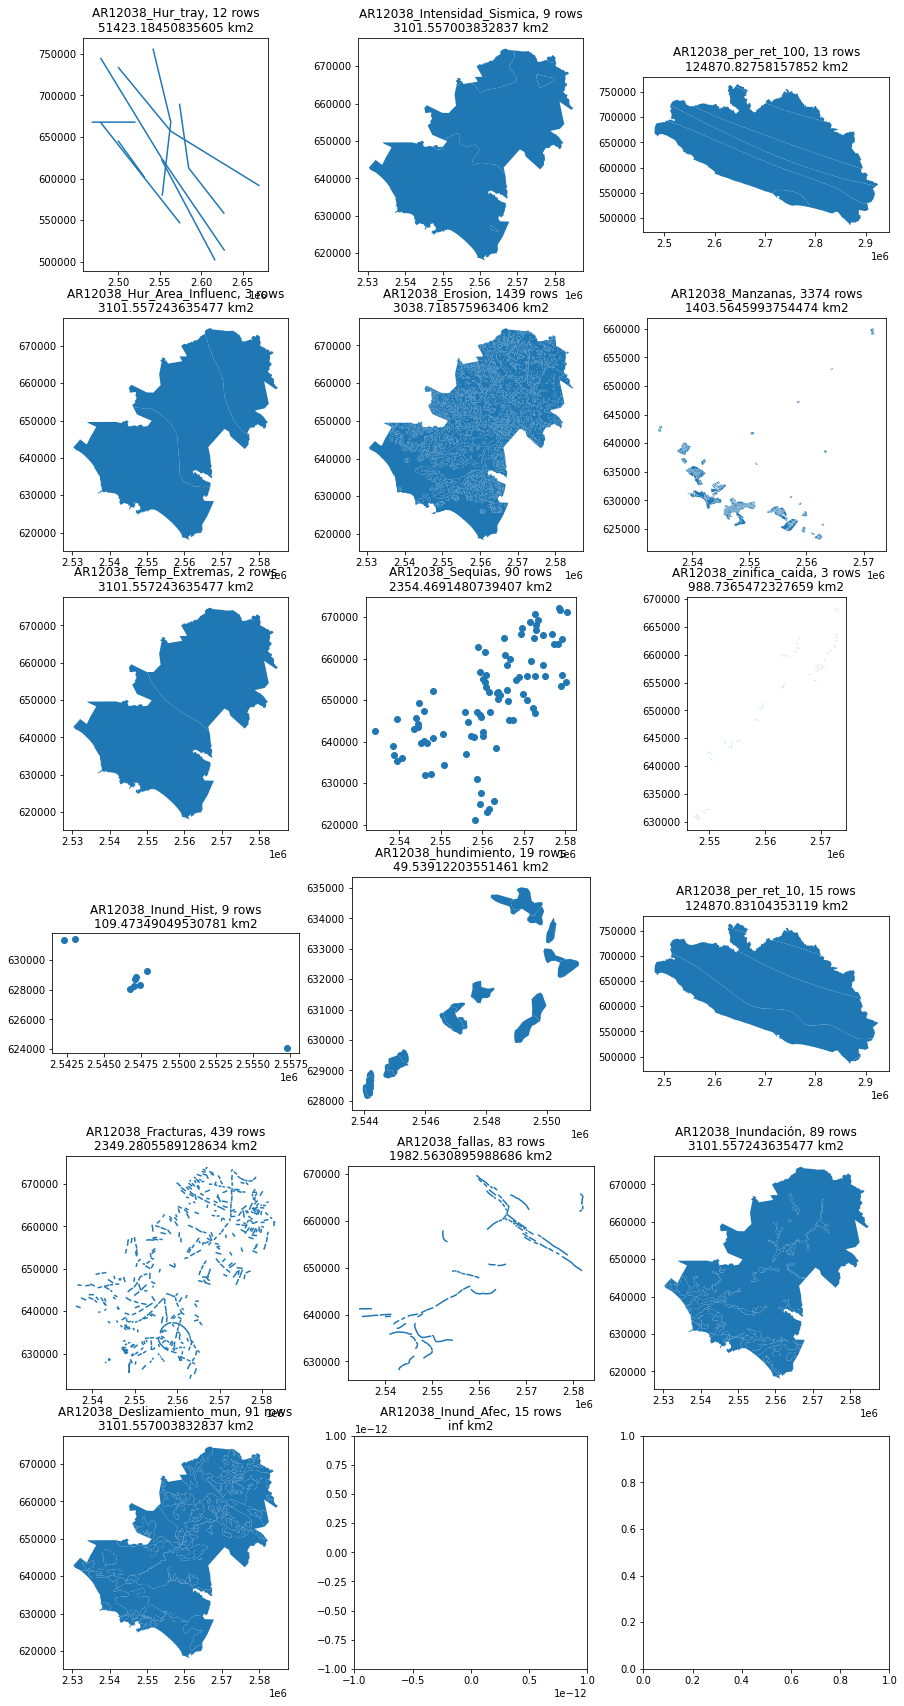

In [67]:
# 
risk_layer_count = len(risk_layers)
cols = 3
rows = risk_layer_count // cols + (1 if risk_layer_count % cols > 0 else 0)
_, axs = plt.subplots(rows, cols, figsize=(15,30))
for idx, risk_layer_gdf in enumerate(risk_layers):
    ax = axs[idx//cols, idx%cols]
    bounds = risk_layer_gdf.total_bounds
    area = (bounds[2]-bounds[0]) * (bounds[3]-bounds[1]) / 10**6
    ax.set_title(f'{risk_dirs[idx]}, {risk_layer_gdf.shape[0]} rows\n{area} km2')
    risk_layer_gdf.plot(ax=ax)

## Administrative Boundaries

Shape: (2463, 10)


,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry
0,01,001,01001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01,002,01002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((-101.99941 22.21951, -101.99940 22.2..."
2,01,003,01003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01,004,01004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3..."
4,01,005,01005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((-102.31034 22.03716, -102.30653 22.0..."


Number of different values for column CVEGEO: 2463


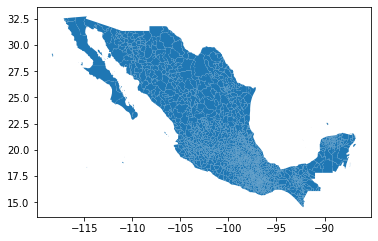

In [68]:
# Load all boundaries
bounds_gdf = geopandas.read_file(os.path.join(boundaries_path, 'muni_2018gw'))
print(f'Shape: {bounds_gdf.shape}')
display(bounds_gdf.head())
bounds_gdf.plot()
print(f'Number of different values for column CVEGEO: {len({v for v in bounds_gdf.CVEGEO})}')

Shape: (81, 10), crs: epsg:4326


<AxesSubplot:>

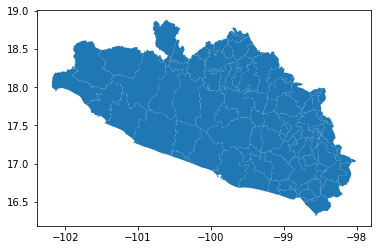

In [69]:
# get only guerrero municipalities
guerrero_mun_gdf = bounds_gdf[bounds_gdf.NOM_ENT == 'Guerrero']
print(f'Shape: {guerrero_mun_gdf.shape}, crs: {guerrero_mun_gdf.crs}')
guerrero_mun_gdf.plot()

In [70]:
# transform guerrero municipalities geometries to the same crs used by risks
risks_crs = risk_layers[0].crs
guerrero_mun_gdf = guerrero_mun_gdf.to_crs(risks_crs)

<AxesSubplot:>

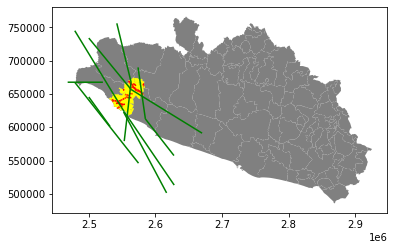

In [71]:
# display some risk layer on top of municipalities
_, ax = plt.subplots()
guerrero_mun_gdf.plot(ax=ax, color='gray')
risk_layers[-4].plot(ax=ax, color='red')
risk_layers[0].plot(ax=ax, color='green')
risk_layers[1].plot(ax=ax, color='yellow')


## How are risks distributed among municipalities?

In [72]:
# lets collect the risks from different layers that correspond to every municipality
risk_layers_per_mun = dict() # {municipality_id: {risk_layer_idx_1:[risk_layer_objid_1, risk_layer_objid_2, ...]}}
for risk_layer_idx, risk_layer_gdf in enumerate(risk_layers):
    # join every municipality spatially interacting with a risk geometry
    joins_gdf = geopandas.sjoin(guerrero_mun_gdf, risk_layer_gdf)[['CVEGEO', 'OBJECTID']]
    for _, row in joins_gdf.iterrows():
        mun_id = row.CVEGEO
        mun_risk_layers = risk_layers_per_mun.get(mun_id, dict())
        risk_obj_ids = mun_risk_layers.get(risk_layer_idx, [])
        risk_obj_ids.append(row.OBJECTID)
        mun_risk_layers[risk_layer_idx] =  risk_obj_ids
        risk_layers_per_mun[mun_id] = mun_risk_layers

print(f'Number of municipalities with at least one risk associated: {len(risk_layers_per_mun)} out of {guerrero_mun_gdf.shape[0]}')

Number of municipalities with at least one risk associated: 81 out of 81


/root/miniconda3/envs/georisk/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geometry,CVEGEO,NOM_MUN,risk_count
371,"MULTIPOLYGON (((2751691.417 581029.067, 275168...",12001,Acapulco de JuÃ¡rez,3
372,"POLYGON ((2821428.196 662752.221, 2821351.539 ...",12002,Ahuacuotzingo,3
373,"POLYGON ((2649441.226 699625.411, 2649480.699 ...",12003,AjuchitlÃ¡n del Progreso,6
374,"POLYGON ((2889479.646 619614.434, 2889510.978 ...",12004,Alcozauca de Guerrero,4
375,"POLYGON ((2874286.433 636791.281, 2874755.325 ...",12005,Alpoyeca,2


        risk_count
count    81.000000
mean     75.308642
std     628.027560
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max    5657.000000
Map showing the number of risk per municipality


/root/miniconda3/envs/georisk/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/root/miniconda3/envs/georisk/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

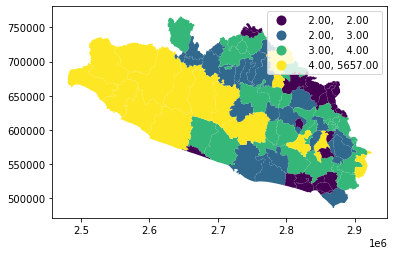

In [73]:
# Show total risk counts per municipality
mun_risk_counts_gdf = guerrero_mun_gdf[['geometry', 'CVEGEO', 'NOM_MUN']]
mun_risk_counts_gdf['risk_count'] = mun_risk_counts_gdf.CVEGEO.apply(lambda mun_id: sum(len(risk_layers_objids) for risk_layers_objids in risk_layers_per_mun[mun_id].values()))
display(mun_risk_counts_gdf.head())
print(mun_risk_counts_gdf.describe())
print('Map showing the number of risk per municipality')
mun_risk_counts_gdf.plot(column='risk_count', legend=True, scheme='quantiles')

Risks are distributed among the full state but most of them interact with Zihuatanejo de Azueta only.

In [74]:
# municipalities with more risks
mun_risk_counts_gdf[mun_risk_counts_gdf.risk_count > 4]

,geometry,CVEGEO,NOM_MUN,risk_count
373,"POLYGON ((2649441.226 699625.411, 2649480.699 ...",12003,AjuchitlÃ¡n del Progreso,6
386,"POLYGON ((2552579.353 721724.755, 2552577.286 ...",12016,Coahuayutla de JosÃ© MarÃ­a Izazaga,27
392,"POLYGON ((2623952.641 720721.182, 2624077.762 ...",12022,Coyuca de CatalÃ¡n,35
399,"POLYGON ((2768826.066 625035.691, 2768828.556 ...",12029,Chilpancingo de los Bravo,5
402,"POLYGON ((2723973.350 666469.321, 2724028.344 ...",12032,General Heliodoro Castillo,5
404,"POLYGON ((2809687.575 707728.096, 2809670.486 ...",12034,Huitzuco de los Figueroa,5
408,"MULTIPOLYGON (((2584644.930 659068.992, 258395...",12038,Zihuatanejo de Azueta,5657
411,"POLYGON ((2858422.613 598327.374, 2858226.708 ...",12041,Malinaltepec,5
418,"POLYGON ((2584644.930 659068.992, 2584845.741 ...",12048,PetatlÃ¡n,49
424,"POLYGON ((2677848.002 690589.271, 2678924.177 ...",12054,San Miguel Totolapan,5


## Get risks within certain distance of a given point

Display specific risks from each layer (using the object id) that are within a radius of 2km from an arbitrary point inside Zihuatanejo de Azueta (located at index 408) using a simple spatial query.

In [75]:
point = mun_risk_counts_gdf.loc[408].geometry.centroid
print(f'Point at location {point.x}, {point.y} contains the following risks within a radius of 2 km:')
total_risks = 0
radius = point.buffer(2000)
for idx, risk_layer in enumerate(risk_layers):
    risk_objids = risk_layer[risk_layer.geometry.intersects(radius)].OBJECTID.values
    if len(risk_objids):
        print(f'\t{risk_dirs[idx]}: {",".join(str(objid) for objid in risk_objids)}')
        total_risks += len(risk_objids)
print(f'Total number of risks: {total_risks}')

Point at location 2559937.824133216, 648002.543281246 contains the following risks within a radius of 2 km:
	AR12038_Hur_tray: 3
	AR12038_Intensidad_Sismica: 3,5
	AR12038_per_ret_100: 8
	AR12038_Hur_Area_Influenc: 2
	AR12038_Erosion: 40,236,581,817,869,872,884,900,919,926,931,965,987,989,1008,1036
	AR12038_Manzanas: 2576,2577,2578,2579,2580,2581,2582,2583,2584,2585,2586,2587,2588,2589,2937
	AR12038_Temp_Extremas: 1,2
	AR12038_Sequias: 42,60,80
	AR12038_zinifica_caida: 1,2,3
	AR12038_per_ret_10: 6
	AR12038_fallas: 36,37
	AR12038_Inundación: 1,58,59,60,79
	AR12038_Deslizamiento_mun: 8,10,27,35,36,59,61,80
Total number of risks: 60
